In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline

Using TensorFlow backend.


## Configurations

In [2]:
import dish

DATASET_DIR = os.path.join(os.getcwd(), 'data')

class NoResizeConfig(dish.DishConfig):
    IMAGE_RESIZE_MODE = "none"

config = NoResizeConfig()

## Notebook Preferences

In [3]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Dataset

In [10]:
dataset = dish.DishDataset()
dataset.load_dish(DATASET_DIR, subset='val')
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 114
Class Count: 8
  0. BG                                                
  1. green                                             
  2. red                                               
  3. purple                                            
  4. navy                                              
  5. silver                                            
  6. gold                                              
  7. black                                             


## Display Samples

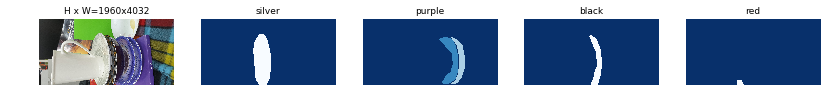

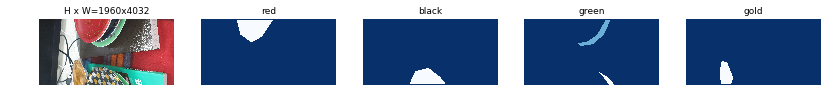

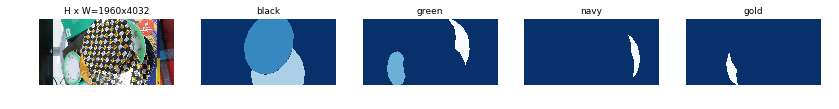

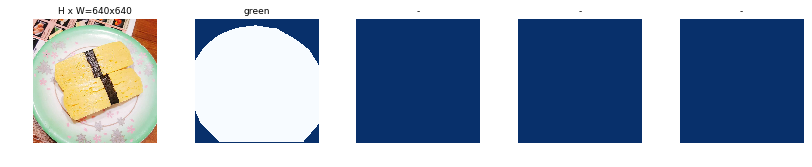

In [7]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

molded_image             shape: (1920, 2560, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1920, 2560, 5)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (5,)                  min:    1.00000  max:    4.00000  int64
bbox                     shape: (5, 4)                min:    6.00000  max: 1747.00000  int32


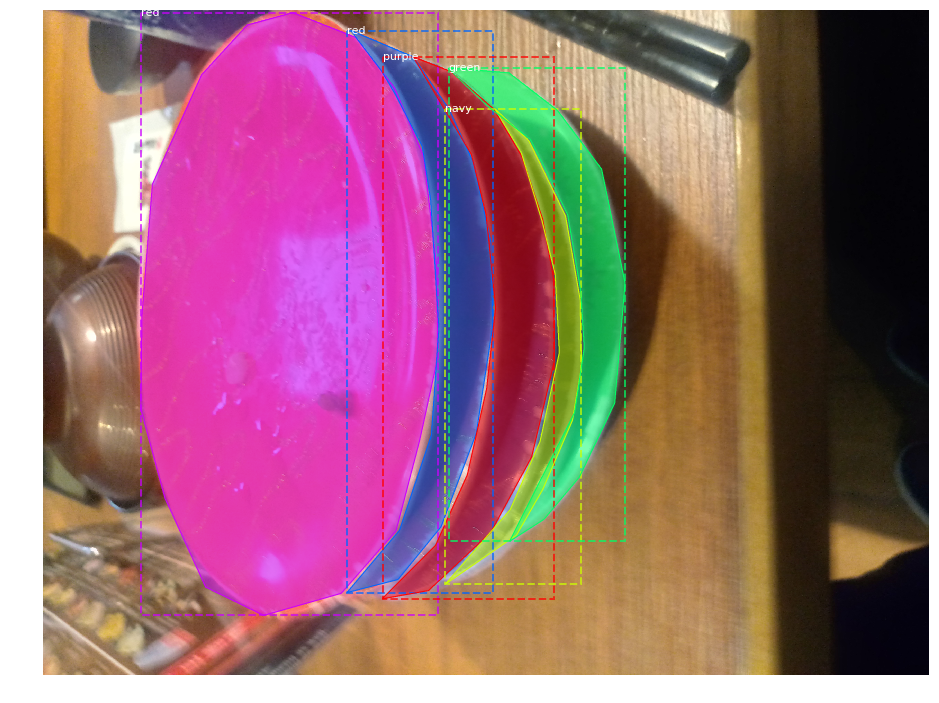

['red', 'red', 'purple', 'navy', 'green']
[[   6  282 1747 1140]
 [  58  879 1681 1300]
 [ 134  981 1699 1478]
 [ 284 1163 1657 1556]
 [ 166 1172 1533 1682]]


In [11]:
# Example of loading a specific image by its source ID
source_id = "dish_567"

# Map source ID to Dataset image_id
# Notice the nucleus prefix: it's the name given to the dataset in NucleusDataset
image_id = dataset.image_from_source_map["dish.{}".format(source_id)]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset, config, image_id, use_mini_mask=False)
log("molded_image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

labels = ['green', 'red', 'purple', 'navy', 'silver', 'gold', 'black']
print([labels[ids-1] for ids in class_ids])
print(bbox)